Link to Kaggle - data updates weekly: https://www.kaggle.com/datasets/cityofLA/crime-in-los-angeles/

**LINK TO OUR DATA (Specific to the week we downloaded the data): https://drive.google.com/file/d/1jzwxrWNSDnzSrwM3O3cnUAsa97LaniQk/view?usp=sharing**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading CSV and Creating DataFrame**

In [2]:
crime_df = pd.read_csv('Crime_Data_2010_2017.csv')

In [3]:
crime_df.shape

(1584316, 26)

In [4]:
len(crime_df)

1584316

In [5]:
crime_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [6]:
crime_df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

**Data Cleaning**

In [7]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   DR Number               1584316 non-null  int64  
 1   Date Reported           1584316 non-null  object 
 2   Date Occurred           1584316 non-null  object 
 3   Time Occurred           1584316 non-null  int64  
 4   Area ID                 1584316 non-null  int64  
 5   Area Name               1584316 non-null  object 
 6   Reporting District      1584316 non-null  int64  
 7   Crime Code              1584316 non-null  int64  
 8   Crime Code Description  1583904 non-null  object 
 9   MO Codes                1412557 non-null  object 
 10  Victim Age              1455657 non-null  float64
 11  Victim Sex              1439117 non-null  object 
 12  Victim Descent          1439084 non-null  object 
 13  Premise Code            1584240 non-null  float64
 14  Pr

In [8]:
crime_df.drop(['Reporting District', 'MO Codes', 'Premise Code', 'Premise Description', 'Crime Code 2', 
               'Crime Code 3', 'Crime Code 4', 'Address','Cross Street', 'Location '], axis = 1, inplace=True)

In [9]:
crime_df["Victim Descent Name"] = crime_df["Victim Descent"].map({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 
                                                                      'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian', 
                                                                      'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native', 
                                                                      'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 
                                                                      'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiin', 
                                                                      'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'})

In [10]:
crime_df["Victim Gender"] = crime_df["Victim Sex"].map({'F': 'Female', 'M': 'Male', 'X': 'Unknown'})

In [11]:
#Converting date and times to datetime objects

crime_df['Date Reported'] = pd.to_datetime(crime_df['Date Reported'])
crime_df['Date Occurred'] = pd.to_datetime(crime_df['Date Occurred'])

**Sanity Checks**

In [12]:
#check if dates outside of range

minimum_date_rep = crime_df['Date Reported'].min()
maximum_date_rep = crime_df['Date Reported'].max()

print(minimum_date_rep, maximum_date_rep)

2010-01-01 00:00:00 2017-09-09 00:00:00


In [13]:
minimum_date_occ = crime_df['Date Occurred'].min()
maximum_date_occ = crime_df['Date Occurred'].max()

print(minimum_date_occ, maximum_date_occ)

2010-01-01 00:00:00 2017-09-09 00:00:00


In [14]:
minimum_time = crime_df['Time Occurred'].min()
maximum_time = crime_df['Time Occurred'].max()

print(minimum_time, maximum_time)

1 2359


**Data Exploration**

Text(0.5, 1.0, 'Types of Crimes')

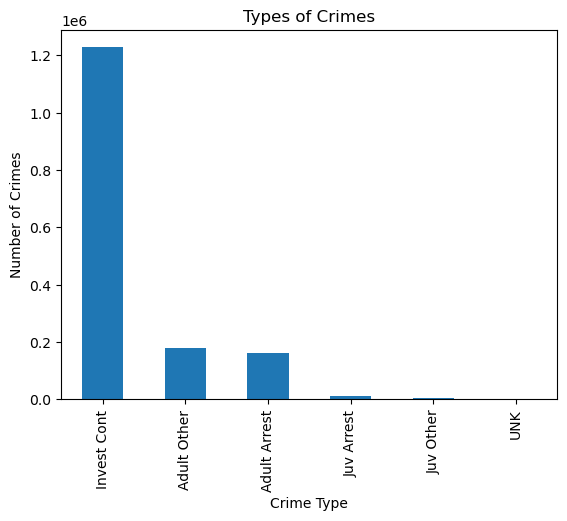

In [15]:
#Exploration 1
crime_type_plot = crime_df["Status Description"].value_counts().plot(kind='bar')
crime_type_plot.set_ylabel("Number of Crimes")
crime_type_plot.set_xlabel("Crime Type")
crime_type_plot.set_title("Types of Crimes")

Text(0.5, 1.0, 'Crimes Per Area')

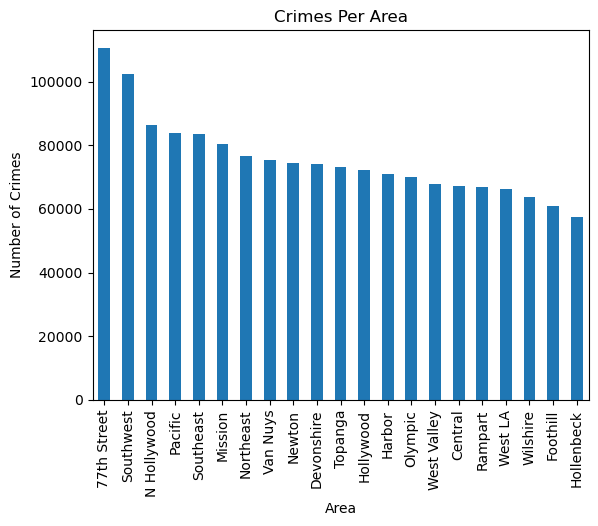

In [16]:
#Exploration 2

area_plot = crime_df["Area Name"].value_counts().plot(kind='bar')
area_plot.set_ylabel("Number of Crimes")
area_plot.set_xlabel("Area")
area_plot.set_title("Crimes Per Area")

**Question 1a**

Number of unique crime codes in dataset: 134
Number of unique crime codes in cleaned dataset: 121

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    319716
VERBAL THREAT                                      43783
UNKNOWN WEAPON/OTHER WEAPON                        40739
HAND GUN                                           25345
SEMI-AUTOMATIC PISTOL                              10096
KNIFE WITH BLADE 6INCHES OR LESS                    9333
OTHER KNIFE                                         6946
UNKNOWN FIREARM                                     6037
VEHICLE                                             5348
REVOLVER                                            4567
Name: Weapon Description, dtype: int64


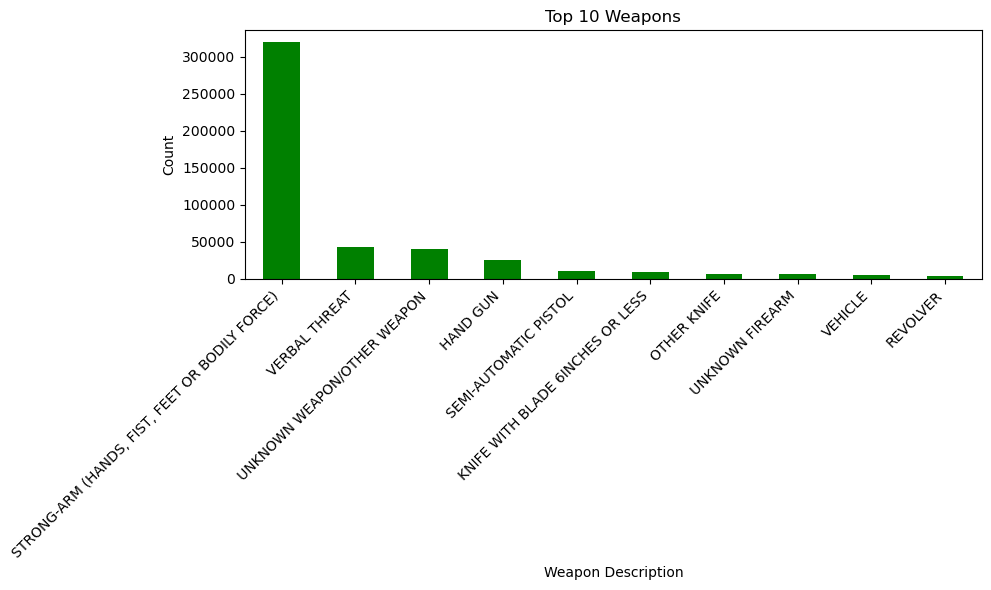

In [17]:
#What is the most common weapon used?

df_weapon_flat = crime_df.reset_index()

df_weapon_cleaned = df_weapon_flat.dropna(subset=['Crime Code Description', 'Weapon Description'])

unique_crime_codes = crime_df['Crime Code Description'].nunique()
print("Number of unique crime codes in dataset:", unique_crime_codes) 

unique_crime_codes = df_weapon_cleaned['Crime Code Description'].nunique()
print("Number of unique crime codes in cleaned dataset:", unique_crime_codes)

print()

weapon_counts = df_weapon_cleaned['Weapon Description'].value_counts()
top_10_weapons = weapon_counts.head(10)
print(top_10_weapons)

weapon_counts = df_weapon_cleaned['Weapon Description'].value_counts()
top_10_weapons = weapon_counts.head(10)

# plotting
plt.figure(figsize=(10, 6))
top_10_weapons.plot(kind='bar', color='green')
plt.title('Top 10 Weapons')
plt.xlabel('Weapon Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Question 1b**

In [18]:
#For the top 10 crimes, what is the top weapon for each?

top_10_crimes = crime_df['Crime Code Description'].value_counts().sort_values(ascending=False).head(10).index
filtered_df_top_10 = crime_df[crime_df['Crime Code Description'].isin(top_10_crimes)]

grouped_df = filtered_df_top_10.groupby(['Crime Code Description', 'Weapon Description']).size().reset_index(name='Count')
top_weapon_for_crime = grouped_df.groupby('Crime Code Description')['Count'].idxmax()
result_df = grouped_df.loc[top_weapon_for_crime, ['Crime Code Description', 'Weapon Description', 'Count']]

result_df

,Crime Code Description,Weapon Description,Count
26,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",HAND GUN,9779
127,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",133707
178,BURGLARY,UNKNOWN WEAPON/OTHER WEAPON,5611
213,BURGLARY FROM VEHICLE,UNKNOWN WEAPON/OTHER WEAPON,4830
267,INTIMATE PARTNER - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",74953
284,THEFT OF IDENTITY,UNKNOWN WEAPON/OTHER WEAPON,56
319,THEFT PLAIN - PETTY ($950 & UNDER),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",2290
382,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",UNKNOWN WEAPON/OTHER WEAPON,1755
429,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",2035
440,VEHICLE - STOLEN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",7


**Question 1c**

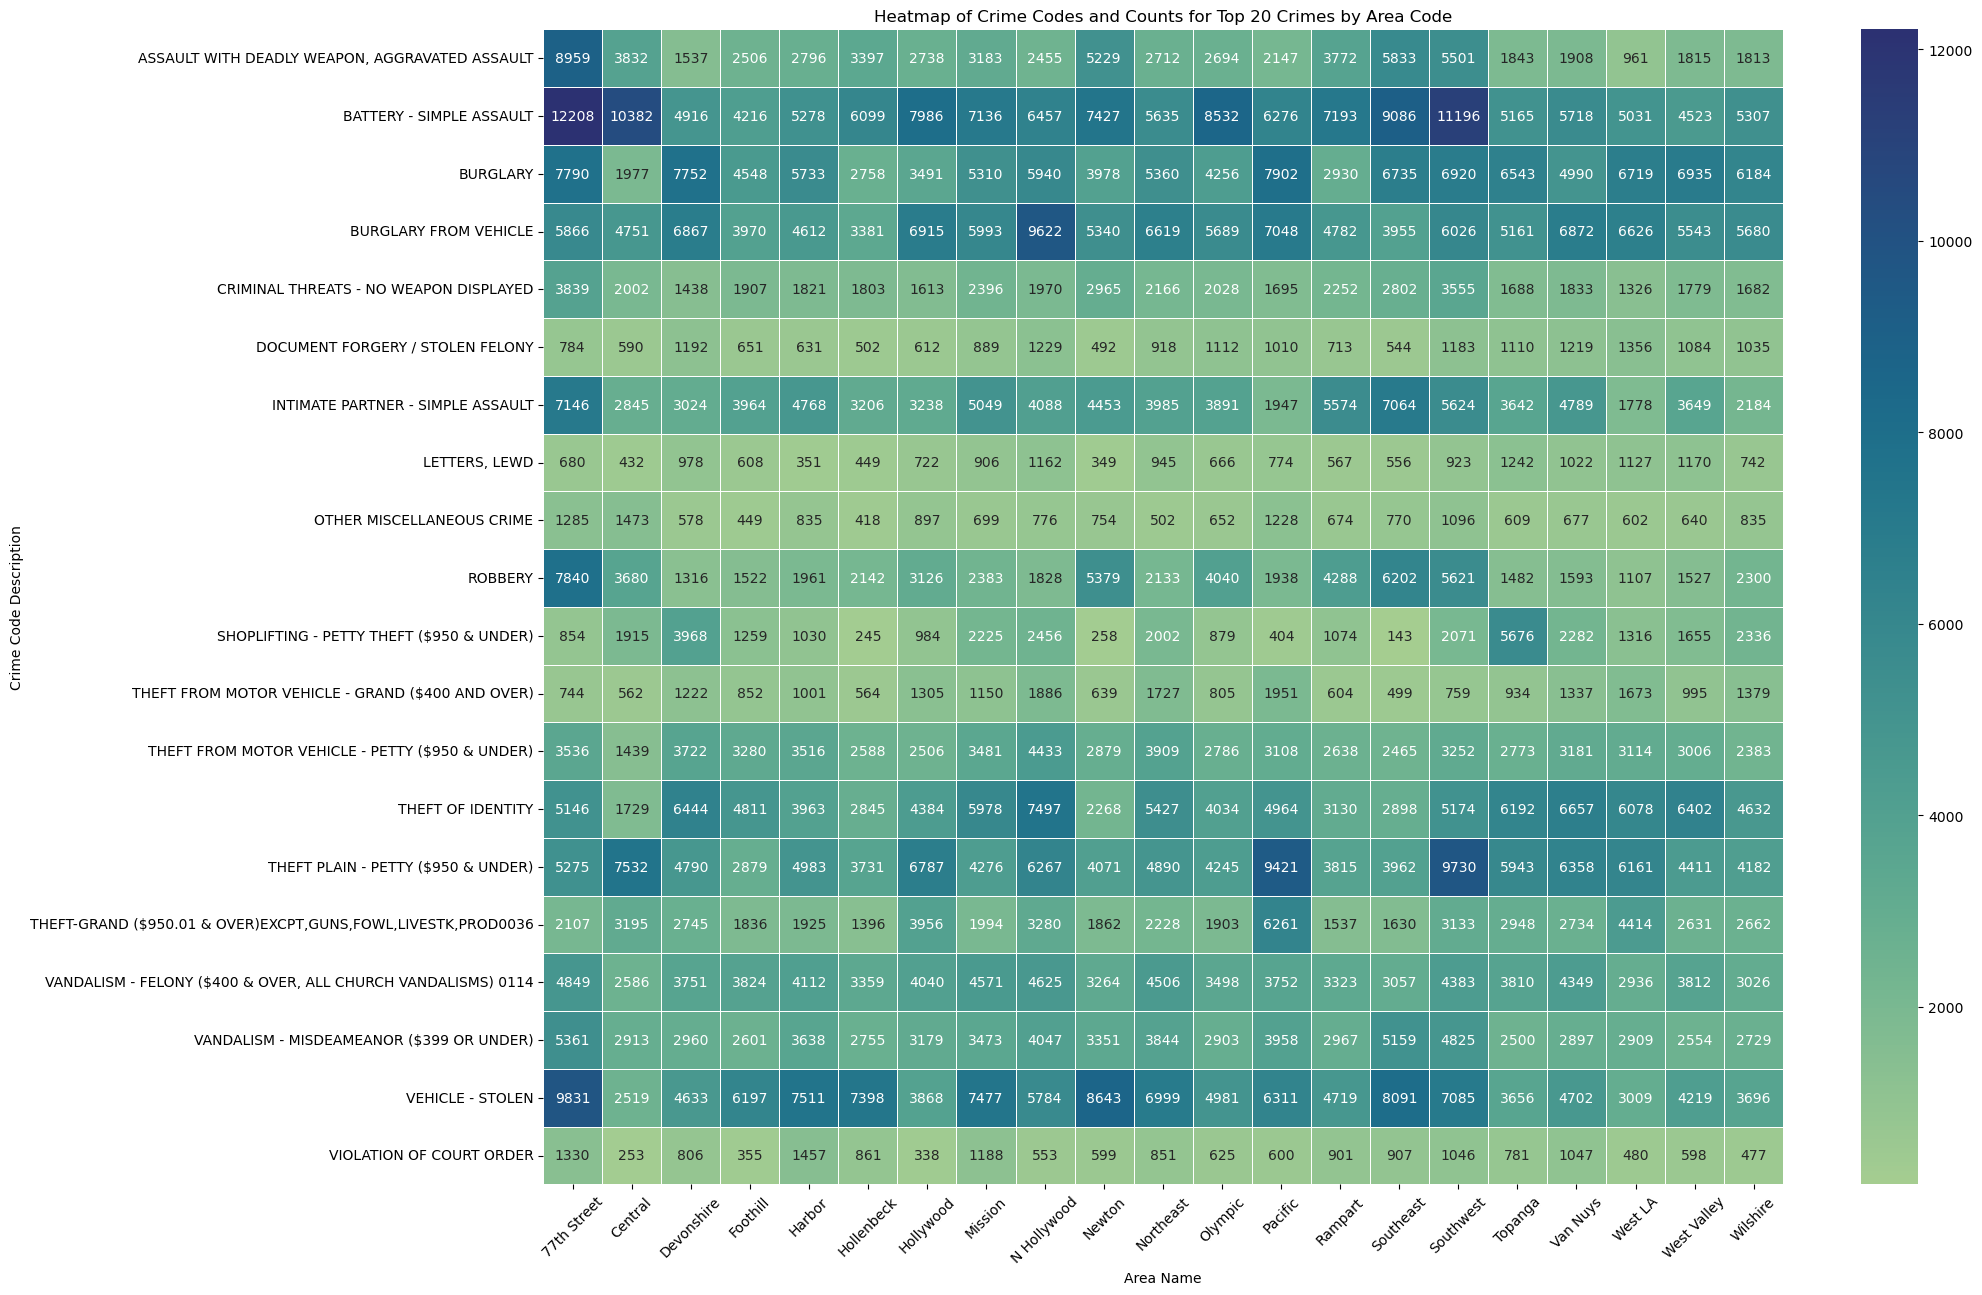

In [19]:
#Do certain areas in Los Angeles exhibit a higher frequency of specific crime codes?

top_20_crimes = crime_df['Crime Code Description'].value_counts().head(20).index

filtered_df = crime_df[crime_df['Crime Code Description'].isin(top_20_crimes)]

heatmap_data = filtered_df.groupby(['Area Name', 'Crime Code Description']).size().unstack(fill_value=0)

heatmap_data = heatmap_data.T

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, cmap="crest", annot=True, fmt="d", linewidths=.5)
plt.xticks(rotation=45)
plt.title('Heatmap of Crime Codes and Counts for Top 20 Crimes by Area Code')
plt.xlabel('Area Name')
plt.ylabel('Crime Code Description')
plt.show()

**Question 1d**

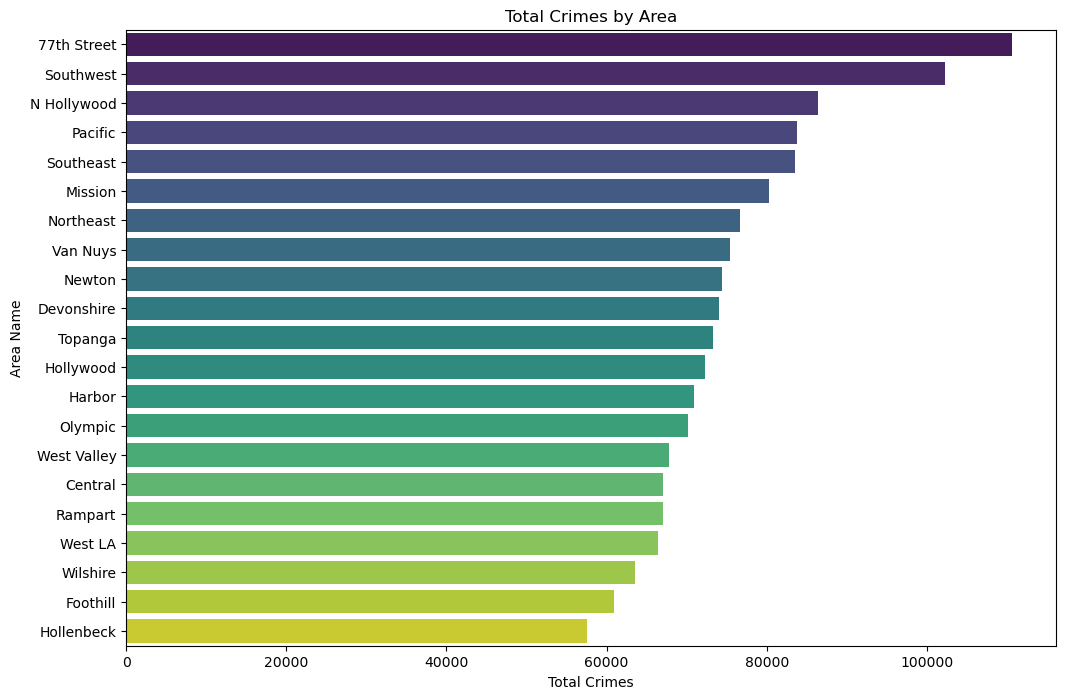

In [20]:
total_crimes_per_area = crime_df.groupby('Area Name').size().reset_index(name='Total Crimes')

total_crimes_per_area = total_crimes_per_area.sort_values(by='Total Crimes', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Crimes', y='Area Name', data=total_crimes_per_area, palette='viridis')
plt.title('Total Crimes by Area')
plt.xlabel('Total Crimes')
plt.ylabel('Area Name')
plt.show()

**Question 2a**

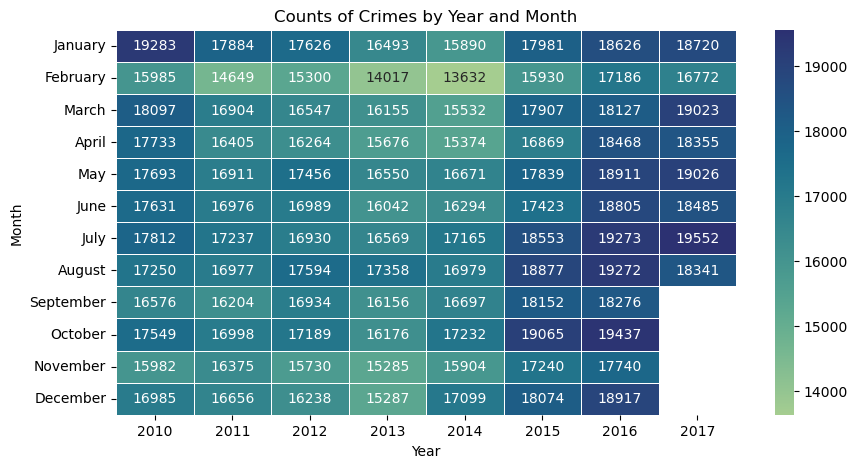

In [21]:
#During which month or year did the highest number of crimes occur?

crime_df['Date_Occurred_Year'] = crime_df['Date Occurred'].dt.year
crime_df['Date_Occurred_Month'] = crime_df['Date Occurred'].dt.month_name()

crime_df_filtered = crime_df[~((crime_df['Date Occurred'] >= '2017-09-01') & (crime_df['Date Occurred'] < '2017-10-01'))]

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

heatmap_data = crime_df_filtered.groupby(['Date_Occurred_Year', 'Date_Occurred_Month']).size().reset_index(name='Crime_Count')

heatmap_table = heatmap_data.pivot(index='Date_Occurred_Month', columns='Date_Occurred_Year', values='Crime_Count').reindex(month_order)

plt.figure(figsize=(10,5))

sns.heatmap(heatmap_table, cmap='crest', annot=True, fmt='g', linewidths=0.5)

plt.title('Counts of Crimes by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')

pass

In [22]:
max_month_indices = heatmap_table.idxmax()
max_values_df = pd.DataFrame({
    'Year': max_month_indices.index,
    'Max Crime Count': [heatmap_table.loc[max_month, year] for year, max_month in zip(max_month_indices.index, max_month_indices.values)],
    'Month': max_month_indices.values
})

print(max_values_df)


   Year  Max Crime Count    Month
0  2010          19283.0  January
1  2011          17884.0  January
2  2012          17626.0  January
3  2013          17358.0   August
4  2014          17232.0  October
5  2015          19065.0  October
6  2016          19437.0  October
7  2017          19552.0     July


**Question 2b**

In [23]:
#Function that gives you the day of the week

def weekday(date):
    date = date.weekday()

    if date == 0:
        return 'Monday'
    elif date == 1:
        return 'Tuesday'
    elif date == 2:
        return 'Wednesday'
    elif date == 3:
        return 'Thursday'
    elif date == 4:
        return 'Friday'
    elif date == 5:
        return 'Saturday'
    elif date == 6:
        return 'Sunday'
    

In [24]:
crime_df['DayOfWeek_Occurred'] = crime_df['Date Occurred'].apply(weekday)

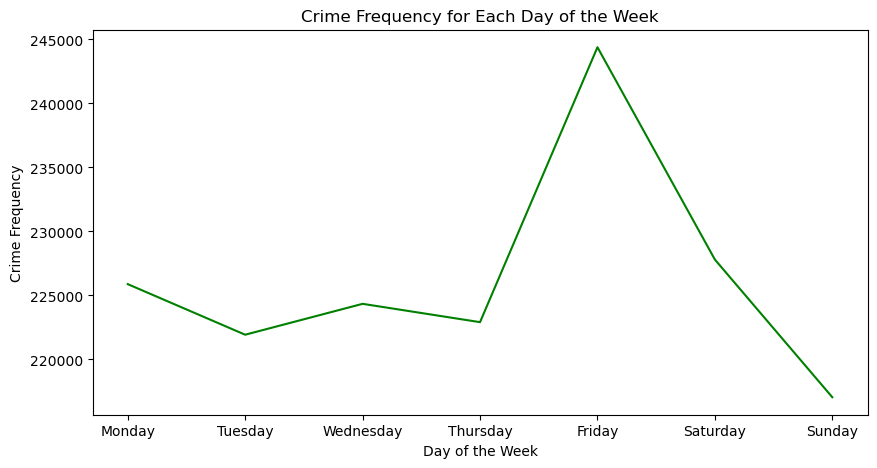

In [25]:
#Do specific days of the week exhibit higher rates of criminal activity?

plt.figure(figsize=(10, 5))
crime_df['DayOfWeek_Occurred'].value_counts().loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.line(color='green')

plt.xlabel('Day of the Week')
plt.ylabel('Crime Frequency')
plt.title('Crime Frequency for Each Day of the Week')

pass

**Question 2c**

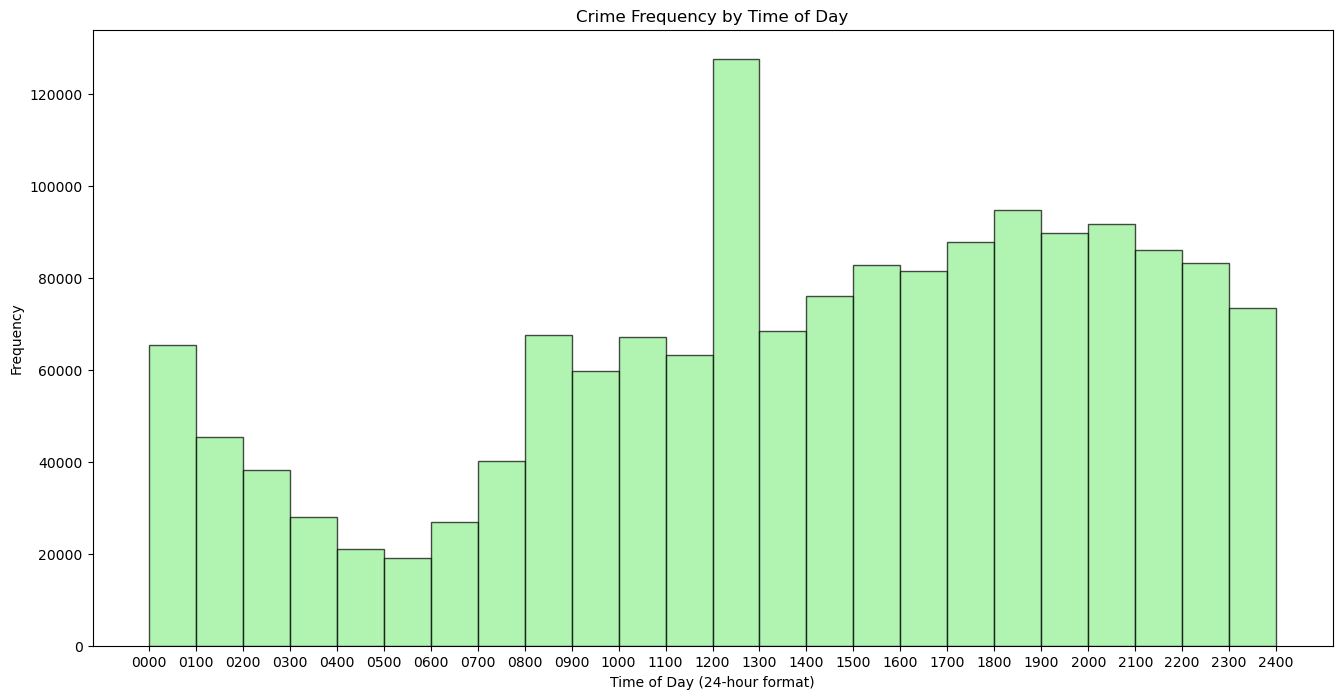

In [26]:
#Do crimes show a higher frequency during particular times of the day?

plt.figure(figsize=(16, 8))
n, bins, patches = plt.hist(crime_df['Time Occurred'], bins=24, range=(0, 2400), color='lightgreen', edgecolor='black', alpha=0.7)

plt.title('Crime Frequency by Time of Day')
plt.xlabel('Time of Day (24-hour format)')
plt.ylabel('Frequency')

plt.xticks(range(0, 2500, 100), [str(i).zfill(4) for i in range(0, 2500, 100)])

pass

**Question 2d**

In [27]:
crime_df['Status Description'].value_counts()

Invest Cont     1227180
Adult Other      178175
Adult Arrest     162424
Juv Arrest        12619
Juv Other          3889
UNK                  29
Name: Status Description, dtype: int64

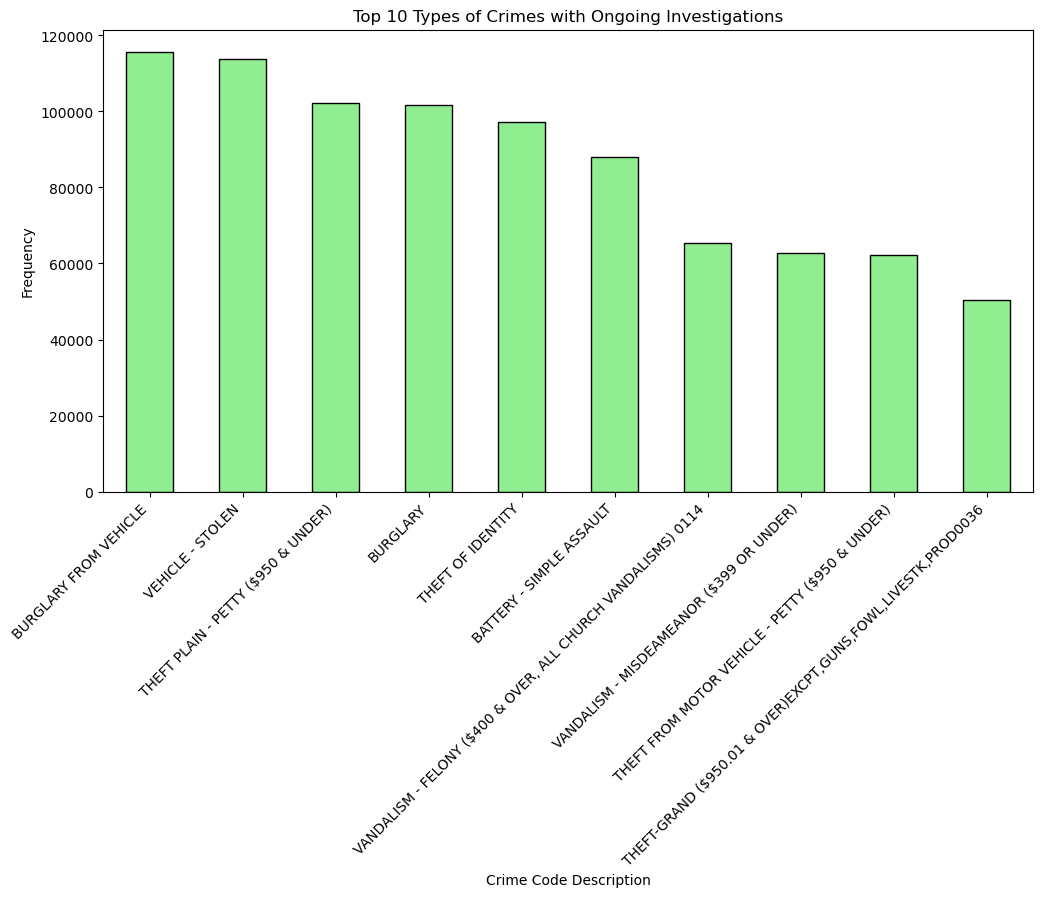

In [28]:
#Do certain types of crimes tend to have a higher likelihood of being ongoing?

ongoing_crimes = crime_df[crime_df['Status Description'] == 'Invest Cont']

top_crimes = ongoing_crimes['Crime Code Description'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_crimes.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.xlabel('Crime Code Description')
plt.ylabel('Frequency')
plt.title('Top 10 Types of Crimes with Ongoing Investigations')

plt.xticks(rotation=45, ha='right')

pass

**Question 3a**

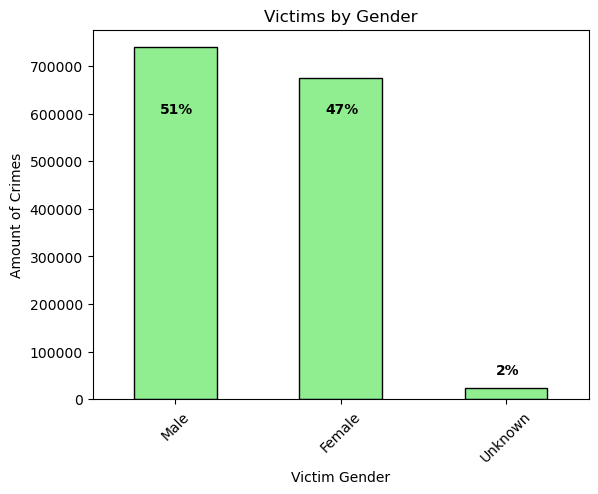

In [29]:
#Fig 3a Graph Crime Counts by Victim Gender
gender = crime_df.groupby("Victim Gender")["Date Occurred"].count().to_frame().reset_index().sort_values("Date Occurred",ascending=False)
gender = gender.dropna(axis=0)
gender_plt = gender.plot(kind="bar",x="Victim Gender",y="Date Occurred",color="lightgreen", edgecolor ='black')
gender_plt.set_ylabel("Amount of Crimes")
gender_plt.set_xticklabels(gender_plt.get_xticklabels(),rotation=45)
gender_plt.get_legend().remove()
gender_plt.set_title("Victims by Gender")
gender_plt.annotate("51%",xy=(-.09,600000),weight='bold',size=10)
gender_plt.annotate("47%",xy=(0.91,600000),weight='bold',size=10)
gender_plt.annotate("2%",xy=(1.94,52000),weight='bold',size=10)

pass

In [30]:
#Fig 3b Gender Percentage Breakdown
gender["Percentage of Total"] = (gender["Date Occurred"]/gender["Date Occurred"].sum()*100).round(2)
gender = gender.set_index('Victim Gender')
gender

,Date Occurred,Percentage of Total
Victim Gender,,
Male,739581,51.39
Female,675402,46.93
Unknown,24080,1.67


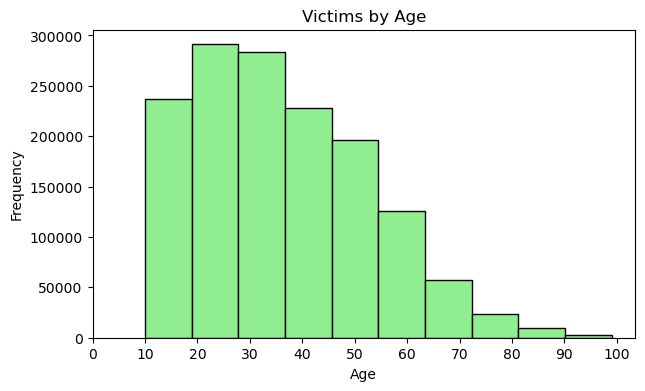

In [31]:
#Fig 3c Graph Crime Counts by Victim Age
age_group = crime_df.groupby("Victim Age")["Date Occurred"].count().to_frame().reset_index().sort_values("Date Occurred",ascending=False)
fig = plt.figure(figsize = (7, 4))
plt.hist(crime_df["Victim Age"],color="lightgreen", edgecolor ='black')
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.title("Victims by Age")
plt.xticks(range(0,101,10))

pass

In [32]:
#Find percentage of victims between 21 and 34 years old
len(crime_df[(crime_df["Victim Age"] >= 21) | (crime_df["Victim Age"] <= 34)])*100 / len(crime_df)

91.87920844074036

In [33]:
#Fig 3d Top Crime Counts by Victim Age and Gender
age_gender_df = crime_df.groupby(["Victim Age","Victim Gender"])["Date Occurred"].count().sort_values(ascending=False).to_frame().reset_index()
age_gender_df = age_gender_df.rename(columns={'Date Occurred': 'Count'})
age_gender_df = age_gender_df[age_gender_df["Victim Gender"] != "Unknown"]
age_gender_df.head(10)

,Victim Age,Victim Gender,Count
0,25.0,Female,20402
1,24.0,Female,20231
2,23.0,Female,19823
3,26.0,Female,19433
4,27.0,Female,18905
5,22.0,Female,18597
6,28.0,Female,18288
7,29.0,Female,17954
8,30.0,Female,17572
9,21.0,Female,17158


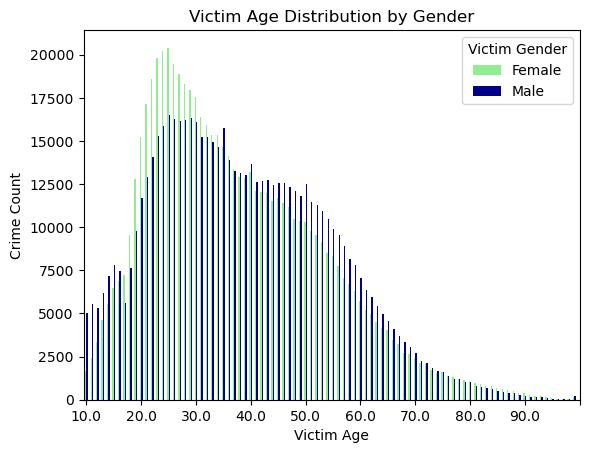

In [34]:
#Fig 3e Graph Crime Counts by Victim Age and Gender
age_gender_df.pivot(index='Victim Age', columns='Victim Gender', values='Count').plot(kind='bar', color=['lightgreen', 'darkblue'])
plt.xlabel('Victim Age')
plt.ylabel('Crime Count')
plt.title('Victim Age Distribution by Gender')
plt.legend(title='Victim Gender')
plt.xticks(range(0,100,10),rotation=0)
plt.show()


**Question 3b**

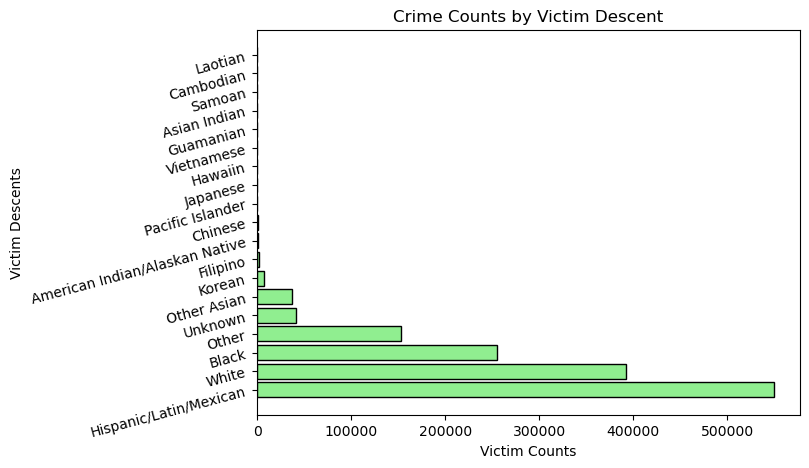

In [35]:
#Fig 3f Top Crime Counts by Victim Descent
descent = crime_df.groupby("Victim Descent Name")["Date Occurred"].count().to_frame().reset_index().sort_values("Date Occurred",ascending=False)
descent = descent.dropna(axis=0)
descent.head(10)
fig = plt.figure(figsize = (7, 5))
plt.barh(descent["Victim Descent Name"],width=descent["Date Occurred"],color="lightgreen", edgecolor ='black')
plt.title("Crime Counts by Victim Descent")
plt.xlabel("Victim Counts")
plt.ylabel("Victim Descents")
plt.yticks(rotation=15)

pass

/var/folders/xk/_fl5b4kj67921nm6p_jcyrzm0000gn/T/ipykernel_7210/3856733386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['Victim Descent Name'].fillna('Unknown', inplace=True)


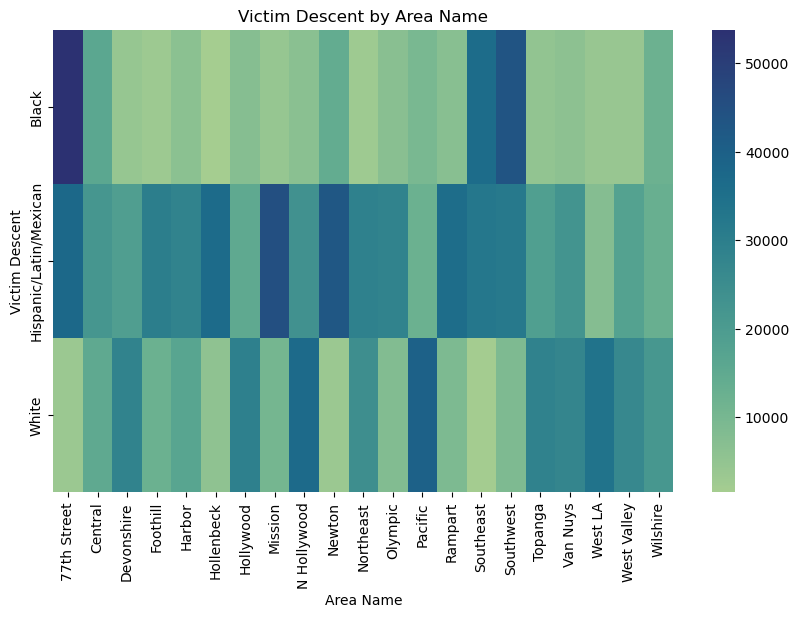

In [36]:
#Fig 3g Top Crime counts by Victim Descent broken out by Area
crime_df_top_3_descent = crime_df[(crime_df["Victim Descent Name"] == "Hispanic/Latin/Mexican") | (crime_df["Victim Descent Name"] == "White") |(crime_df["Victim Descent Name"] == "Black")]
h = crime_df_top_3_descent[["Area Name","Victim Descent Name"]]
h['Victim Descent Name'].fillna('Unknown', inplace=True)

# Pivot the DataFrame
heatmap_data = h.pivot_table(index='Victim Descent Name', columns='Area Name', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, fmt='d', cmap='crest', cbar=True)
plt.title('Victim Descent by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Victim Descent')
plt.show()

**Question 3c**

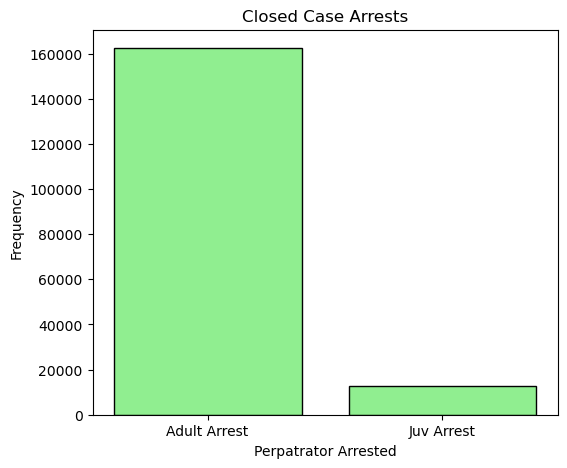

In [37]:
#Fig 3h Top Crime Counts by Closed Cases
status_desc = crime_df.groupby("Status Description")["Date Occurred"].count().to_frame().reset_index().sort_values("Date Occurred",ascending=False)
status_desc = status_desc[(status_desc["Status Description"] == "Adult Arrest") | (status_desc["Status Description"] == "Juv Arrest")]


plt.figure(figsize = (6, 5))
plt.bar(status_desc["Status Description"],height=status_desc["Date Occurred"],color="lightgreen", edgecolor ='black')
plt.title("Closed Case Arrests")
plt.xlabel("Perpatrator Arrested")
plt.ylabel("Frequency")

pass

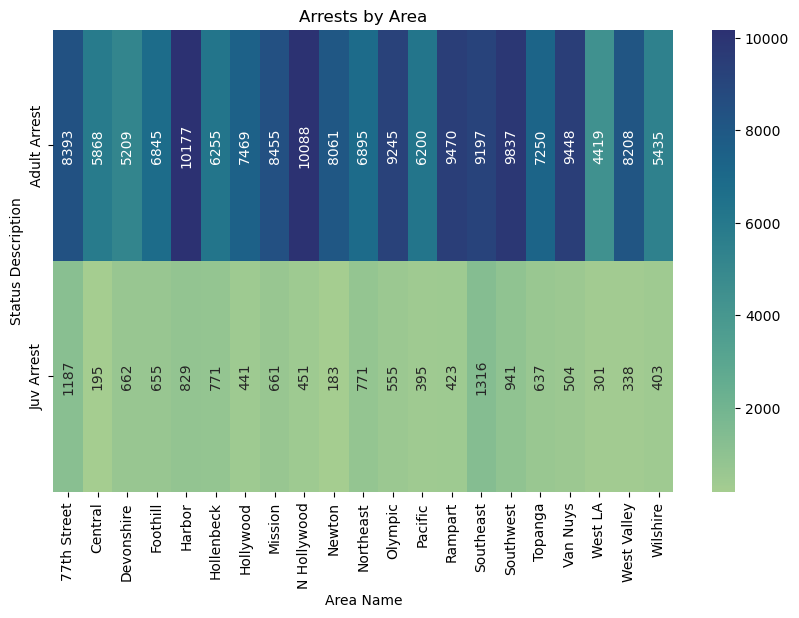

In [38]:
#Fig 3i Top Crime Counts by Area and Arrests made
status_df = crime_df[["Area Name","Status Description"]]
status_df = status_df[(status_df["Status Description"] == "Adult Arrest") | (status_df["Status Description"] == "Juv Arrest")]
status_df['Status Description'].fillna('Unknown', inplace=True)


heatmap_data = status_df.pivot_table(index='Status Description', columns='Area Name', aggfunc=len, fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True,annot_kws={'rotation':90}, fmt='d', cmap='crest', cbar=True)
plt.title('Arrests by Area')
plt.xlabel('Area Name')
plt.ylabel('Status Description')
plt.show()